# LFW - Labeled Faces in the Wild

Der __Labeled Faces in the Wild__ (LFW) Dataset ist ein öffentlich verfügbarer Bilddatensatz für Gesichtserkennung und -verifikation, der echte Bilder von Personen in realen Umgebungen enthält. Er wird häufig für die Evaluierung von Algorithmen im Bereich Gesichtserkennung und Face Verification genutzt.

Der LFW-Datensatz wurde speziell für Face Verification entwickelt, also um zu prüfen, ob zwei Bilder dieselbe Person zeigen oder nicht. Er wird aber auch für Face Recognition (Klassifikation von Gesichtern) und Face Clustering genutzt.

Der Labeled Faces in the Wild (LFW) Datensatz ist einer der wichtigsten Datensätze für Gesichtserkennung und -verifikation in realen Szenarien. Er stellt Modelle vor echte Herausforderungen durch unkontrollierte Bedingungen und dient als Benchmark für moderne Deep-Learning-Ansätze in der Gesichtserkennung.

### Hauptmerkmale des LFW Datensatzes

* Anzahl der Bilder: 13.233
* Anzahl der Personen: 5.749
* Bildquelle: Bilder wurden aus dem Internet gesammelt (z. B. Nachrichtenseiten)
* Bildgröße: 250×250 Pixel (Originalgröße)
* Farben: RGB
* Gesichtserkennungstyp: Ungefilterte, natürliche Bilder mit Variationen in Beleuchtung, Pose und Hintergrund

### Einlesen (und ggf. einmaliger Download) des Datensatzes

Die in `torchvision` angebotene Methode `LFWPeople` funktioniert leider nicht (mehr). `Scikit-learn` liefert nur eine Teilmenge des Datensatzes zurück.

Auf `kagglehub` kann man den kompletten Datensatz herunterladen (der Standardpfad wird durch die Umgebungsvariable `KAGGLE_DATA_DIR` definiert):

In [7]:
from torchvision.datasets import ImageFolder
import kagglehub

data_path = kagglehub.dataset_download("jessicali9530/lfw-dataset")

root = f'{data_path}/lfw-deepfunneled/lfw-deepfunneled'
train_data = ImageFolder(root = root )
names = train_data.classes
print(f'Anzahl der Bilder:  {len(train_data)}, Verzeichnis = {data_path}')

Anzahl der Bilder:  13233, Verzeichnis = C:\Users\Admin\.cache\kagglehub\datasets\jessicali9530\lfw-dataset\versions\4


### Beispielbilder

In den Strukturen `train_data` und `test_data` befinden sich nun die Bilddaten und die dazugehörenden Labels.

#### Bildformat in PyTorch

`PyTorch` erwartet (farbige) Bilddaten als dreidimensionalen `Tensor`: Die drei Farbinformationen sind als drei übereinanderliegende Ebenen angeordnet. Normalerweise bestehen Bilddaten aus einem zweidiemnsionalen Array mit jeweils drei Farbwerten (RGB). Um zwischen diesen beiden Formaten zu wechseln, kann man die Methode `permute` verwenden, mit den die Dimensionen eines `Tensors` "vertauscht" werden.

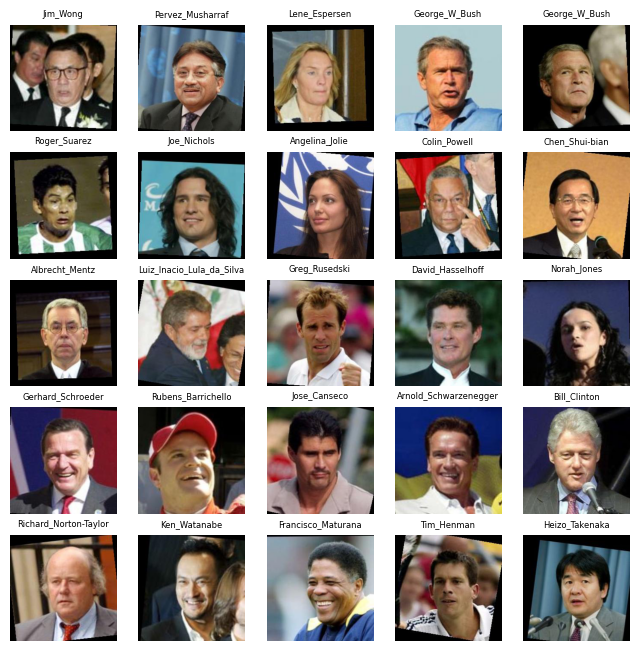

In [9]:
import matplotlib.pyplot as plt
from random import randint

fig, axs = plt.subplots(5, 5, figsize=(8,8))

for n, ax in enumerate(axs.flat):
    image, label = train_data[randint(0,len (train_data))]
    ax.set_title(names[label],fontsize=6)
    ax.imshow(image)
    ax.axis('off')     